[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Concepts/Python/Multiple%20Comparisons.ipynb)

# Definitions

The multiple comparisons problem in statistics occurs when multiple statistical inferences are done simultaneously, which greatly increases the probability that any one inference will yield an erroneous result, by chance. A lot has been written about this problem, including:

- [Its prevalence in fMRI data analysis](https://www.sciencedirect.com/science/article/pii/S1053811912007057?via%3Dihub) (including a compelling illustration by this [prizewinning study](https://blogs.scientificamerican.com/scicurious-brain/ignobel-prize-in-neuroscience-the-dead-salmon-study/)\)

- [How Baysian methods can avoid the problem](http://www.stat.columbia.edu/~gelman/research/published/multiple2f.pdf).

- [General approaches for correcting for multiple comparisons](http://www.biostathandbook.com/multiplecomparisons.html).

Here we will provide some intuition for the problem using a simple thought experiment, to sensitize you to how much of a problem it can be. Consider performing the same statistical test on *N* different samples corresponding to, say, different voxels in fMRI data, using a *p*-value of $\alpha$ (typically 0.05) for each test.

Thus, for any one test, the probability of getting a Type I error (rejecting $H_0$ when $H_0$ is true) is $\alpha$:

$p_{error}=\alpha$

For two tests, the probably of getting a Type I error for either test is just one minus the combined probability of not getting a Type I error from either one:

$p_{error}=1-(1-\alpha)(1-\alpha)$

For *N* tests, the probably of getting a Type I error for either test is just one minus the combined probability of not getting a Type I error from any one:

$p_{error}=1-(1-\alpha)^N$

Run the cell below to see that the probability of getting a Type I error under these conditions grows rapidly with *N*, implying that it becomes very, very likely that you will get a "statistically significant result" just by chance if you do enough tests:

Text(0, 0.5, '$P_{error}$')

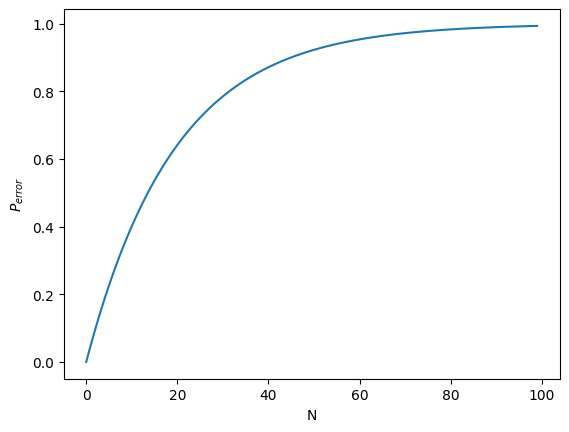

In [1]:
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.05
N = np.arange(0,100)
plt.plot(N, 1-(1-alpha)**N)
plt.xlabel('N')
plt.ylabel('$P_{error}$')

# Correcting for multiple comparisons



There are a number of different methods that can be used to [correct for this problem](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5506159/). Below are two common methods.




## Bonferroni correction

The simplest way to correct for Type I errors (false positives) in multiple comparisons is to divide $\alpha$ by the number of comparisons, known as the [Bonferroni correction](https://mathworld.wolfram.com/BonferroniCorrection.html). This is a very conservative test that is typically used when the number of comparisons is relatively small and you want to avoid Type I errors.

## Benjamini–Hochberg procedure


Another approach is to more carefully control the false-discovery rate using the [Benjamini–Hochberg procedure](https://www.jstor.org/stable/2346101?seq=1#metadata_info_tab_contents):

1\. Rank the individual *p*-values in ascending order, labeled *i*=1...*n*

2\. For each *p*-value, calculate its "critical value" as (*i*/*n*)*Q*, where *i* is the rank, *n* is the total number of tests, and *Q* is the false discovery rate (a percentage) that you choose (typically 0.05).

3\. In your rank-ordered, original *p*-values, find the largest value that is smaller than its associated critical value; this *p*-value is the new criterion (i.e., reject $H_0$ for all cases for which *p* ≤ this value).

# Exercise

In this exercise we will run through an example of correcting for multiple comparisons with both the Benjamini-Hochberg procedure and the more conservative Bonferroni correction.

First, simulate multiple (say, 1000) t-tests comparing two samples with equal means and standard deviations, and save the p-values. Obviously, at p<0.05 we expect that ~5% of the simulations to yield a "statistically significant" result (of rejecting the NULL hypothesis that the samples come from distributions with equal means).

Second, once you have the simulated p-values, apply both methods to address the multiple comparisons problem.

Third, set the sample 1 and sample 2 means to be 1 and 2 respectively, and re-run the exercise. What do you notice? What if you make the difference between means even greater?

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [8]:
#simulate 1000 t test
#samples should have equal means and standard deviations
#calculate p values for each group

# Group A population parameters
mu_a = 4
std_a = 8

# Group B population parameters
mu_b = 4
std_b = 8

# for simulations
num_experiments = 1000
sample_size = 50  # Define a sample size for each group in each experiment

# Lists to store results
p_values = []
t_statistics = []


# Loop for each simulation
#The for loop repeats the process of generating samples and performing a t-test exactly 1000 times.
for _ in range(num_experiments):
    # Generate two independent random samples from their respective normal distributions
    sample_a = np.random.normal(loc=mu_a, scale=std_a, size=sample_size)
    sample_b = np.random.normal(loc=mu_b, scale=std_b, size=sample_size)

    # Perform the independent two-sample t-test (Welch's t-test)
    # equal_var=False is used because the standard deviations are different
    t_stat, p_value = st.ttest_ind(a=sample_a, b=sample_b)

    # Store the results: adds the value of the variable t_stat to the end of the list named t_statistics.
    #In the context of data analysis, this is typically done to store a series of calculated t-statistic values
    #for later use.
    t_statistics.append(t_stat)
    p_values.append(p_value)

# Set the significance level (alpha)
alpha = 0.05

# Count the number of significant results (Type I errors)
significant_count = sum(1 for p in p_values if p < alpha)


print(mu_a)
print(mu_b)
print(std_a)
print(std_b)
print(p_values)
print(t_statistics)
print(f"Number of significant results (p < {alpha}): {significant_count}")
print(f"Expected number of significant results by chance: {num_experiments * alpha:.0f}")
print(f"Proportion of significant results: {significant_count / num_experiments:.4f}")

4
4
8
8
[np.float64(0.6602748302525379), np.float64(0.37428486806107275), np.float64(0.6212989309637751), np.float64(0.5478487074901524), np.float64(0.6584004102686347), np.float64(0.0112375082747605), np.float64(0.7135923565662291), np.float64(0.3449220810728264), np.float64(0.18137103627623521), np.float64(0.039279321506522705), np.float64(0.1653517485131691), np.float64(0.023105233242162942), np.float64(0.5577604618560137), np.float64(0.4333910700531205), np.float64(0.6061828798511875), np.float64(0.09553748846974994), np.float64(0.33540389301881), np.float64(0.822396200505967), np.float64(0.5189695669680201), np.float64(0.25732759032321995), np.float64(0.08579189101291362), np.float64(0.29242198245882756), np.float64(0.20767920343384633), np.float64(0.19722993507980216), np.float64(0.5706430566434635), np.float64(0.8395197050486275), np.float64(0.7141313970164374), np.float64(0.03227648948133389), np.float64(0.8872443104386416), np.float64(0.1890052845506774), np.float64(0.95974758

In [10]:
# --- Multiple Comparisons Correction ---
alpha = 0.05
print(f"Applying multiple comparison corrections for {num_experiments} tests with alpha = {alpha}")

Applying multiple comparison corrections for 1000 tests with alpha = 0.05


In [12]:
#multiple comparison corrections:Bonferroni
from statsmodels.stats.multitest import multipletests

# The `multipletests` function can apply various methods, including Bonferroni.
reject_bonferroni, p_adjusted_bonferroni, _, _ = multipletests(p_values, alpha=alpha, method='bonferroni')

num_rejected_bonferroni = np.sum(reject_bonferroni)
bonferroni_corrected_alpha = alpha / num_experiments

print("Bonferroni Correction Results:")
print(f"Adjusted significance level (alpha / num_tests): {bonferroni_corrected_alpha:.8f}")
print(f"Number of rejected null hypotheses (significant results): {num_rejected_bonferroni}")
print(f"Proportion of false positives (Type I error): {num_rejected_bonferroni / num_experiments:.4f}")
print("\nInterpretation: This is the most conservative method for controlling the family-wise error rate (FWER).")
print("It is designed to ensure that the probability of making even one false discovery is less than or equal to alpha.")
print(f"With a true null hypothesis, we expect very few, if any, significant results.")
print("-" * 70)

Bonferroni Correction Results:
Adjusted significance level (alpha / num_tests): 0.00005000
Number of rejected null hypotheses (significant results): 0
Proportion of false positives (Type I error): 0.0000

Interpretation: This is the most conservative method for controlling the family-wise error rate (FWER).
It is designed to ensure that the probability of making even one false discovery is less than or equal to alpha.
With a true null hypothesis, we expect very few, if any, significant results.
----------------------------------------------------------------------


p_values: This is the input, an array or list of raw p-values from multiple statistical tests.
alpha: This is the overall significance level (e.g., 0.05) for the entire family of tests.
method='bonferroni': This specifies that the Bonferroni correction method should be used. The function adjusts each individual p-value by multiplying it by the number of tests performed.


In [13]:
#Multiple comparisons corrections: Benjamini

# 2. Benjamini-Hochberg
# This method controls the False Discovery Rate (FDR).
reject_bh, p_adjusted_bh, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

num_rejected_bh = np.sum(reject_bh)

print("Benjamini-Hochberg (FDR) Correction Results:")
print(f"Number of rejected null hypotheses (significant results): {num_rejected_bh}")
print(f"Proportion of significant results: {num_rejected_bh / num_experiments:.4f}")
print("\nInterpretation: This method is less conservative than Bonferroni and controls the false discovery rate.")
print("With a true null hypothesis, the proportion of significant results should be around or below alpha.")
print("-" * 70)


Benjamini-Hochberg (FDR) Correction Results:
Number of rejected null hypotheses (significant results): 0
Proportion of significant results: 0.0000

Interpretation: This method is less conservative than Bonferroni and controls the false discovery rate.
With a true null hypothesis, the proportion of significant results should be around or below alpha.
----------------------------------------------------------------------


In [15]:
# 3. Compare with Uncorrected Results
# For context, let's see the results without any correction
num_uncorrected_significant = np.sum(np.array(p_values) < alpha)
print("Uncorrected Results (for comparison):")
print(f"Number of significant results (p < {alpha}): {num_uncorrected_significant}")
print(f"Proportion of significant results (Type I error): {num_uncorrected_significant / num_experiments:.4f}")
print(f"The expected proportion of Type I errors is {alpha}, which this result should approximate.")

Uncorrected Results (for comparison):
Number of significant results (p < 0.05): 51
Proportion of significant results (Type I error): 0.0510
The expected proportion of Type I errors is 0.05, which this result should approximate.


When simulating a scenario where you change the means from being the same to being different, the null hypothesis becomes false.

The number of significant results found by the Bonferroni method was lower than the uncorrected results but the number of significant results found by the Benjamini-Hochberg method will be higher than Bonferroni but lower than the uncorrected results.

# Additional Resources


How to correct for multiple comparisons in [Matlab](https://www.mathworks.com/help/stats/multcompare.html), [R](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/p.adjust.html), and [Python](https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html)

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania